1) **Delivery_time** -> Predict delivery time using sorting time 

**Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python**.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

#Predicting delivery Time using sorting time

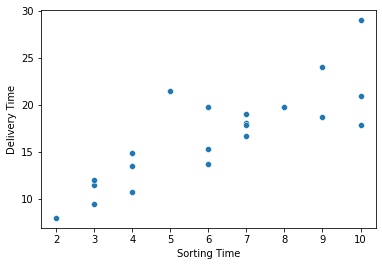

In [7]:
sns.scatterplot(x=df["Sorting Time"], y=df["Delivery Time"])

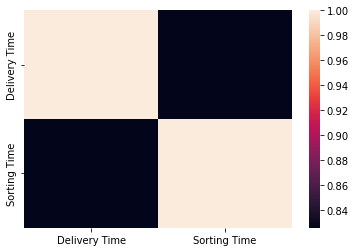

In [50]:
df.corr()#correlation
sns.heatmap(df.corr())

In [51]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
x=np.array(df["Sorting Time"])
print("Dimension :",x.ndim)
print("shape :",x.shape)

Dimension : 1
shape : (21,)


In [10]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [12]:
y=np.array(df["Delivery Time"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [13]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [16]:
x_test

array([[10],
       [ 6],
       [ 9],
       [ 8],
       [ 3]])

In [17]:
y_test

array([[29.  ],
       [13.75],
       [24.  ],
       [19.83],
       [12.03]])

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.score(x_test,y_test)

0.5873423857767448

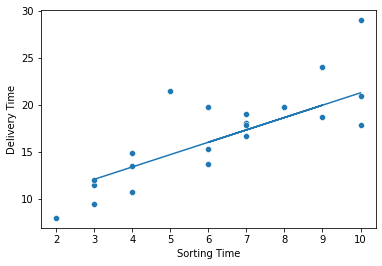

In [22]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [25]:
model.coef_

array([[1.31291553]])

In [26]:
model.intercept_

array([8.16162125])

In [27]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[21.29],
       [16.04],
       [19.98],
       [18.66],
       [12.1 ]])

In [28]:
x_test[0:,0]

array([10,  6,  9,  8,  3])

In [29]:
y_test[0:,0]

array([29.  , 13.75, 24.  , 19.83, 12.03])

In [32]:
df1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
df1 = pd.DataFrame(df1)
df1.to_csv("C:\\Users\\predicted_delivery_time.csv")
df1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,10,29.00,21.29
1,6,13.75,16.04
2,9,24.00,19.98
3,8,19.83,18.66
4,3,12.03,12.10


In [33]:
import statsmodels.formula.api as smf

In [35]:
linear_model = smf.ols("y~x", data=df).fit()

In [36]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [37]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        13:11:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#EDA-EXPLORATORY DATA ANALYSIS

Describing data

In [38]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Duplicates

In [39]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

Unique values

In [40]:
df["Delivery Time"].unique()
df["Sorting Time"].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5])

#Visualisation

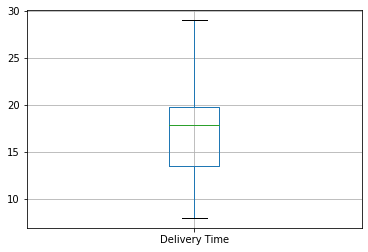

In [42]:
#Box plot
df.boxplot(column=['Delivery Time'],grid=True)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

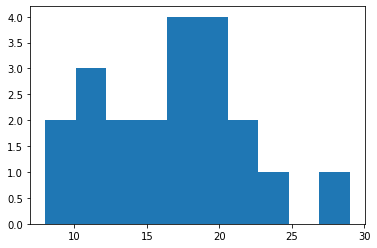

In [45]:
plt.hist(df['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

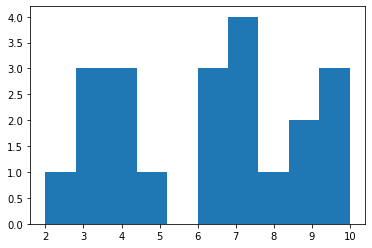

In [46]:
plt.hist(df['Sorting Time'])

Checking Null Values

In [52]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#Transformation

**Log Transformation**

In [62]:
import statsmodels.api as sm

In [57]:
x_log = np.log(df['Sorting Time'])

In [58]:
y_log = np.log(df['Delivery Time'])

In [64]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    5.72e-17
Time:                        13:59:09   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Square_root Transformation**

In [66]:
x_sqrt = np.sqrt(df['Sorting Time'])
y_sqrt = np.sqrt(df['Delivery Time'])

In [67]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    2.10e-20
Time:                        14:00:49   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Zero Transformation**

In [ ]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    2.10e-20
Time:                        14:03:51   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Label Encoding**

In [87]:
from sklearn.preprocessing import LabelEncoder

In [91]:
df['Sorting Time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5])

In [93]:
df['Sorting Time'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: Sorting Time, dtype: int64

In [94]:
#Changes does not effect the "data" dataframe
data1=df.copy()

In [95]:
labelencoder = LabelEncoder()
df['Sorting Time'] = labelencoder.fit_transform(df.iloc[:,-1])
df

,Delivery Time,Sorting Time
0,21.00,8
1,13.50,2
2,19.75,4
3,24.00,7
4,29.00,8
5,15.35,4
6,19.00,5
7,9.50,1
8,17.90,8
9,18.75,7


In [97]:
df['Sorting Time'].value_counts()

5    4
8    3
2    3
4    3
1    3
7    2
6    1
0    1
3    1
Name: Sorting Time, dtype: int64

**One Hot Encoding**

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [103]:
enc.fit_transform(df[['Sorting Time']]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [104]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['Sorting Time']]).toarray())

In [105]:
enc_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
# merge with main df 
data_final = df.iloc[:,0:4].join(enc_df)
data_final

,Delivery Time,Sorting Time,0,1,2,3,4,5,6,7,8
0,21.00,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.50,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.75,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,24.00,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.00,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,15.35,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,19.00,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,9.50,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,17.90,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,18.75,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
